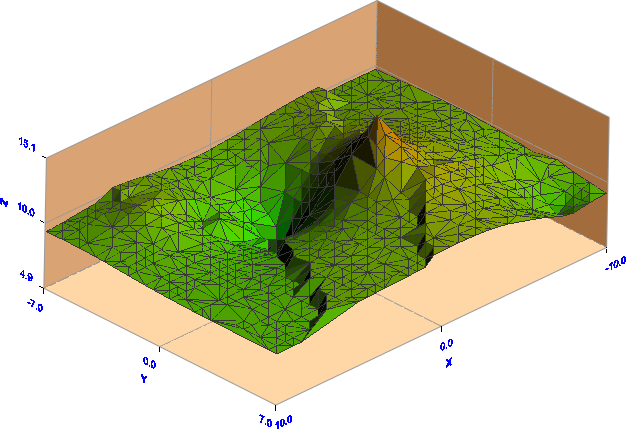

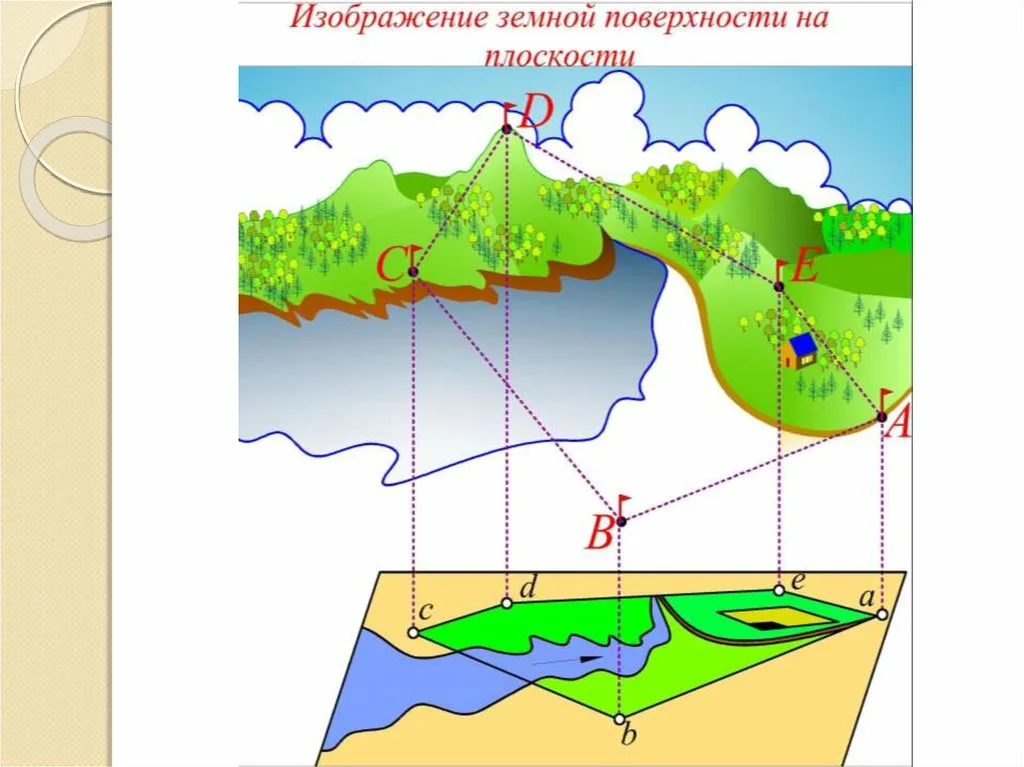

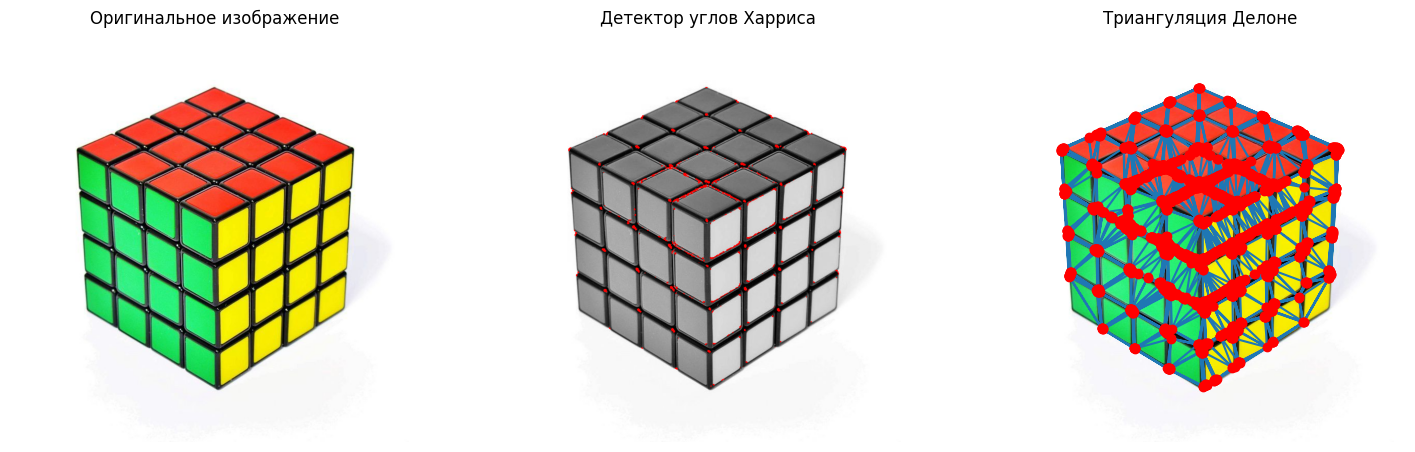

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Загрузка изображения
img = cv2.imread('cube.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обнаружение углов с помощью метода Харриса
corners = cv2.cornerHarris(gray_image, 3, 1, 0)
marked_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
marked_image[corners > 0.01 * corners.max()] = [0, 0, 255]

# Получение координат углов
corner_coords = np.argwhere(corners > 0.01 * corners.max())

# Триангуляция точек
points = corner_coords[:, ::-1]  # Переворачиваем координаты (y, x) на (x, y)
tri = Delaunay(points)

# Создание подграфиков
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Отображение оригинального изображения
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Оригинальное изображение')
axs[0].axis('off')

# Отображение изображения с отмеченными углами
axs[1].imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Детектор углов Харриса')
axs[1].axis('off')

# Отображение триангуляции точек
axs[2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[2].triplot(points[:, 0], points[:, 1], tri.simplices)
axs[2].scatter(points[:, 0], points[:, 1], color='red')
axs[2].set_title('Триангуляция Делоне')
axs[2].axis('off')

# Отображение графиков
plt.show()


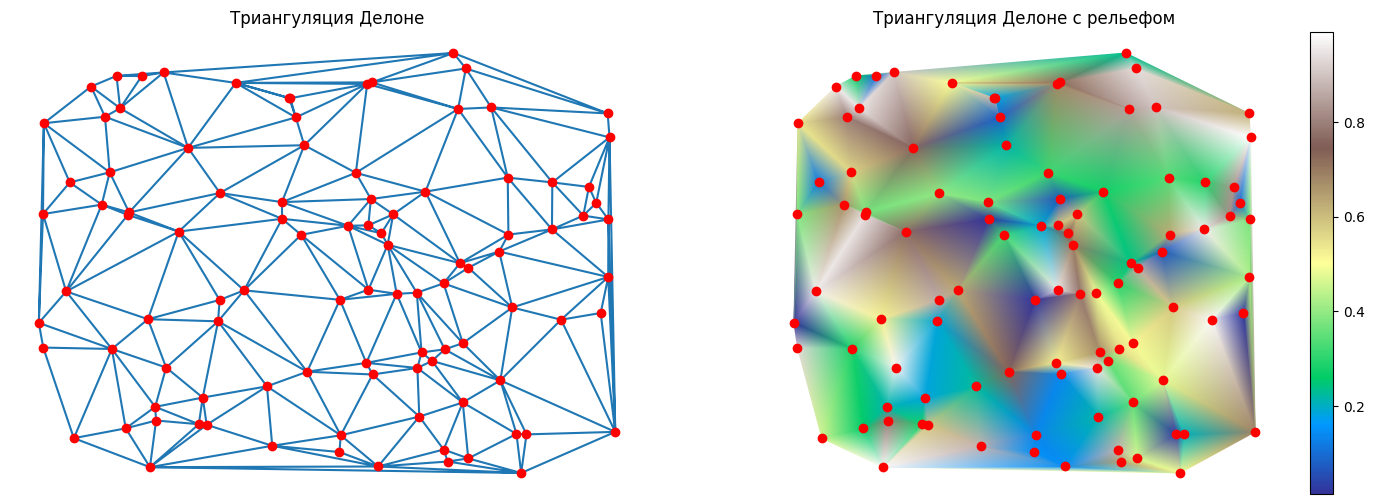

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Создание случайных точек и высот
np.random.seed(0)
points = np.random.rand(100, 2)  # 100 точек в диапазоне [0, 1]
heights = np.random.rand(100)  # Высоты точек в диапазоне [0, 1]

# Триангуляция точек
tri = Delaunay(points)

# Создание подграфиков
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Отображение триангуляции точек
axs[0].triplot(points[:, 0], points[:, 1], tri.simplices)
axs[0].scatter(points[:, 0], points[:, 1], color='red')
axs[0].set_title('Триангуляция Делоне')
axs[0].axis('off')

# Отображение триангуляции с изменением рельефа по цветам
tpc = axs[1].tripcolor(points[:, 0], points[:, 1], tri.simplices, heights, cmap='terrain', shading='gouraud')
axs[1].scatter(points[:, 0], points[:, 1], color='red')
axs[1].set_title('Триангуляция Делоне с рельефом')
axs[1].axis('off')
fig.colorbar(tpc, ax=axs[1], orientation='vertical')

# Отображение графиков
plt.show()